In [1]:
#Titanic Kaggle

In [2]:
import pandas as pd
datos = pd.read_csv("train.csv")

In [3]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<Axes: xlabel='Survived', ylabel='count'>

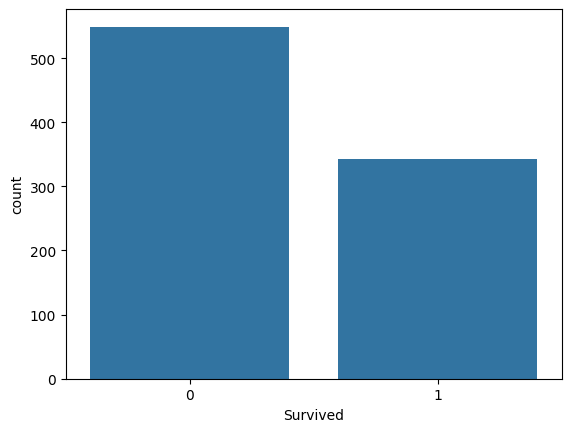

In [5]:
import seaborn as sb
sb.countplot(x="Survived", data=datos)

<Axes: xlabel='Survived', ylabel='count'>

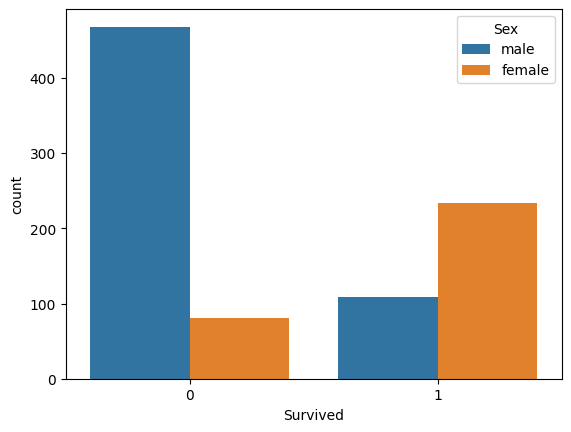

In [6]:
sb.countplot(x="Survived", data=datos, hue="Sex")

In [7]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

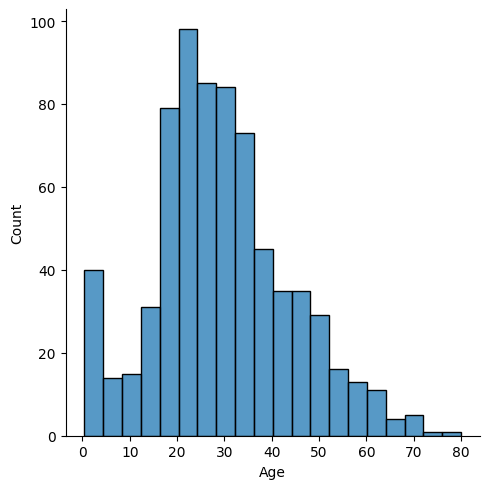

In [8]:
sb.displot(x="Age", data=datos)

In [9]:
datos["Age"]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [10]:
datos["Age"].mean()

29.69911764705882

In [11]:
datos["Age"].fillna(datos["Age"].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [12]:
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())

In [13]:
datos["Age"]

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [14]:
datos.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
datos = datos.drop(["Cabin"], axis=1)

In [16]:
datos["Embarked"].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [17]:
datos = datos.dropna()

In [18]:
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [19]:
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

In [20]:
dummies_sex = pd.get_dummies(datos["Sex"], drop_first=True)

In [21]:
datos = datos.join(dummies_sex)
datos = datos.drop(["Sex"], axis=1)

<Axes: xlabel='Survived', ylabel='count'>

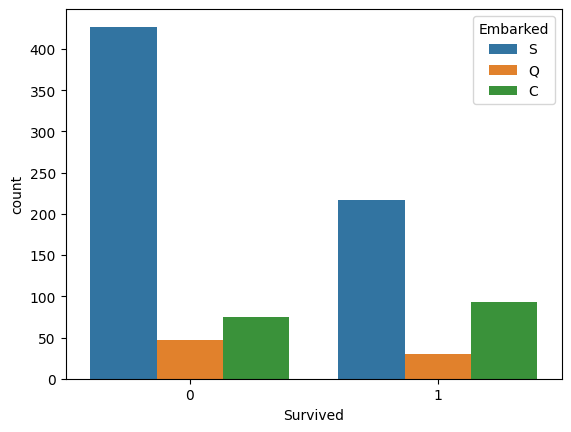

In [22]:
sb.countplot(x="Survived", data=datos, hue="Embarked")

In [23]:
dummies_embarked = pd.get_dummies(datos["Embarked"], drop_first=True)

In [24]:
datos = datos.join(dummies_embarked)
datos = datos.drop(["Embarked"], axis=1)

<Axes: >

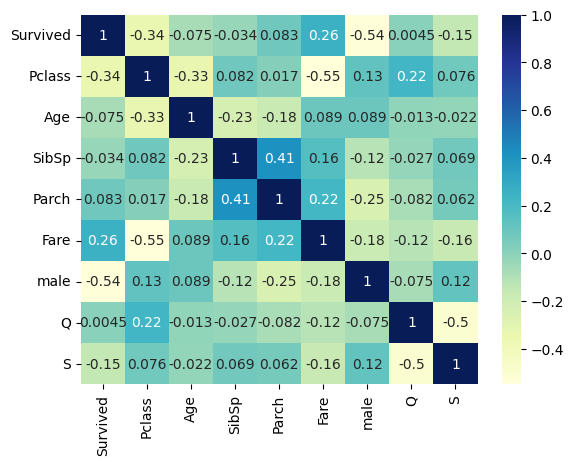

In [25]:
sb.heatmap(datos.corr(), annot=True, cmap="YlGnBu")

<Axes: xlabel='Survived', ylabel='count'>

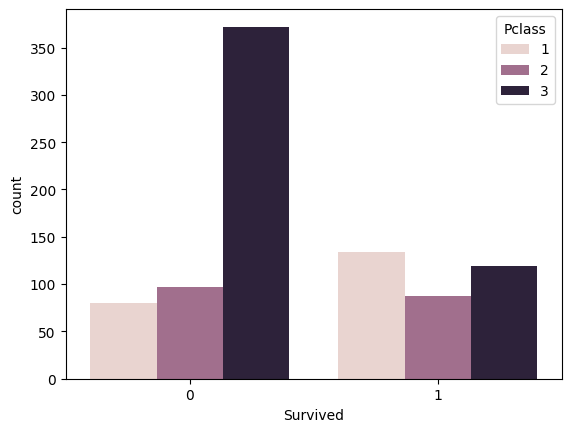

In [26]:
sb.countplot(x="Survived", data=datos, hue="Pclass")

In [27]:
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [28]:
from sklearn.model_selection import train_test_split

X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [29]:
from sklearn.tree import DecisionTreeClassifier

modelo = DecisionTreeClassifier(max_depth=50)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)

In [30]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

0.7921348314606742

In [33]:
from sklearn.tree import DecisionTreeClassifier

resultados =[]
for i in range(1,15):
    modelo = DecisionTreeClassifier(max_depth=i)
    modelo.fit(X_ent, y_ent)
    predicciones = modelo.predict(X_pru)
    exactitud = accuracy_score(y_pru, predicciones)
    print(f"Resultado para {i}: {exactitud}")
    resultados.append(exactitud)


Resultado para 1: 0.7640449438202247
Resultado para 2: 0.7865168539325843
Resultado para 3: 0.8033707865168539
Resultado para 4: 0.8258426966292135
Resultado para 5: 0.8258426966292135
Resultado para 6: 0.8370786516853933
Resultado para 7: 0.8202247191011236
Resultado para 8: 0.8370786516853933
Resultado para 9: 0.8258426966292135
Resultado para 10: 0.8258426966292135
Resultado para 11: 0.7921348314606742
Resultado para 12: 0.7921348314606742
Resultado para 13: 0.8089887640449438
Resultado para 14: 0.797752808988764


<Axes: >

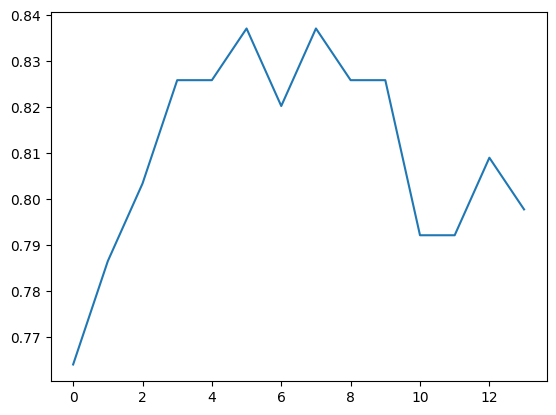

In [34]:
sb.lineplot(data=resultados)

In [35]:
modelo = DecisionTreeClassifier(max_depth=8)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [36]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       123
           1       0.79      0.62      0.69        55

    accuracy                           0.83       178
   macro avg       0.82      0.77      0.79       178
weighted avg       0.83      0.83      0.83       178



In [38]:
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,114,9
Real: Si,21,34


[Text(0.3994140625, 0.9444444444444444, 'male <= 0.5\n0.48\n711\n[426, 285]\nMurió'),
 Text(0.16796875, 0.8333333333333334, 'Pclass <= 2.5\n0.366\n265\n[64, 201]\nVivió'),
 Text(0.075, 0.7222222222222222, 'Fare <= 28.856\n0.066\n146\n[5, 141]\nVivió'),
 Text(0.0625, 0.6111111111111112, 'Fare <= 28.231\n0.148\n62\n[5, 57]\nVivió'),
 Text(0.05, 0.5, 'Age <= 56.0\n0.123\n61\n[4, 57]\nVivió'),
 Text(0.025, 0.3888888888888889, 'SibSp <= 0.5\n0.097\n59\n[3, 56]\nVivió'),
 Text(0.0125, 0.2777777777777778, '0.0\n38\n[0, 38]\nVivió'),
 Text(0.0375, 0.2777777777777778, 'Age <= 25.0\n0.245\n21\n[3, 18]\nVivió'),
 Text(0.025, 0.16666666666666666, '0.0\n7\n[0, 7]\nVivió'),
 Text(0.05, 0.16666666666666666, 'Age <= 27.5\n0.337\n14\n[3, 11]\nVivió'),
 Text(0.0375, 0.05555555555555555, '0.444\n3\n[2, 1]\nMurió'),
 Text(0.0625, 0.05555555555555555, '0.165\n11\n[1, 10]\nVivió'),
 Text(0.075, 0.3888888888888889, 'Fare <= 18.525\n0.5\n2\n[1, 1]\nMurió'),
 Text(0.0625, 0.2777777777777778, '0.0\n1\n[1, 0]\nM

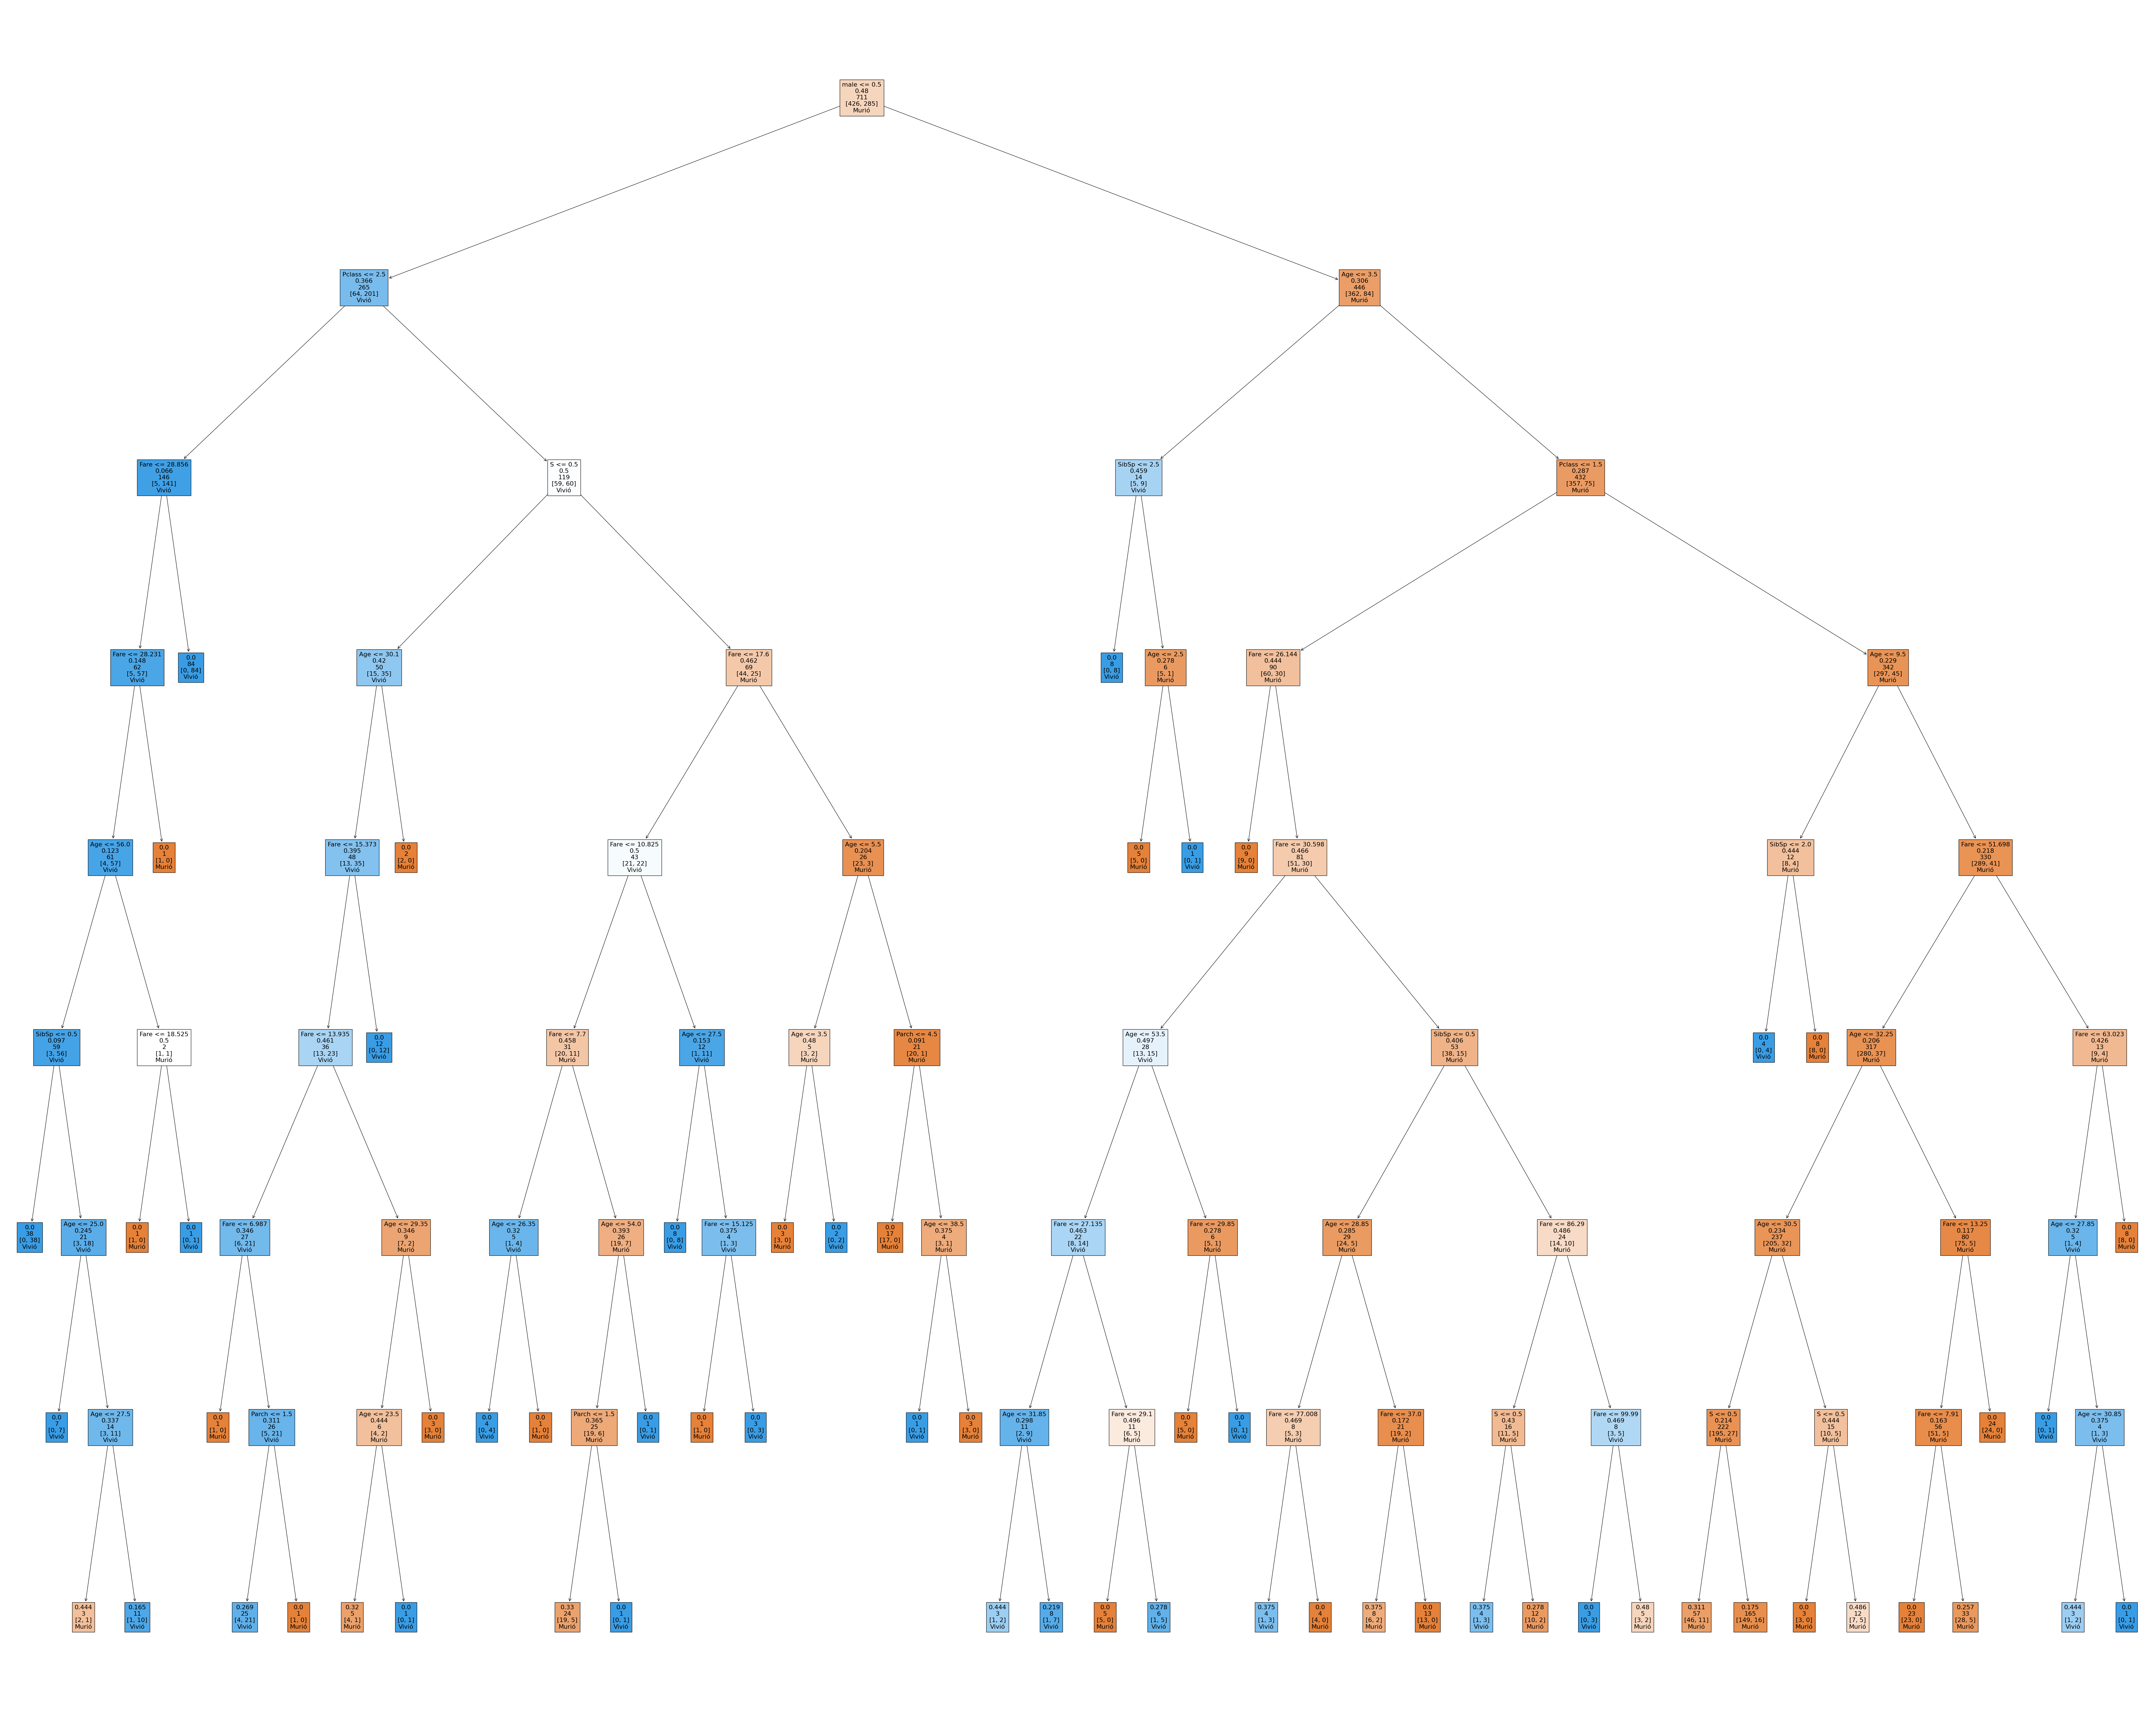

In [41]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt 

plt.figure(figsize=(100,80))
plot_tree(
    modelo, 
    feature_names=X_ent.columns,
    class_names=["Murió", "Vivió"],
    filled=True, label="none"
    )

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pru, predicciones)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_pru, predicciones))

In [ ]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_pru, predicciones)

In [ ]:
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

In [ ]:
X.head()

In [ ]:
nueva_persona = [2, 35, 0, 0, 80, 0, 0, 0]
prediccion = modelo.predict([nueva_persona])
if prediccion[0] == 1:
  print("Sobreviviste")
else:
  print("No sobreviviste")